In [5]:
import sys
from pathlib import Path
import os

color_dict = {'Thy1-GC6s; Cdh23 (Ahl/ahl)':"#8750A1",'Thy1-GC6s; Cdh23 (ahl/ahl)':'#61C055','(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)':'#6783C2'}

##import 
sys.path.insert(0, os.path.join(os.path.dirname(os.path.abspath("")),"Code","Travis"))
import utils
import config

save_path = config.save_path
data_path = config.data_path

if not save_path.exists():
    save_path.mkdir()

Panels c:\Users\travisb\Dropbox (Personal)\Cdh23\Data


In [6]:
import utils
from pathlib import Path
import pickle 

mice = utils.groupData(dir=data_path, analysis_file_name = "wfstack_3.pkl")

In [10]:
#create new pandas data structure for categorical plotting
import pandas as pd
df = pd.DataFrame(columns=['mouse','genotype','sex','freq','threshold'])
mouse_str = []
genotype = []
sex = []
freqs = []
threshold = []

for index, mouse in mice.mice.iterrows():
   mouse.data.calculate_thresholds()
   for i, freq in enumerate([4,8,16,32,64]):
      mouse_str.append(mouse.Mouse)
      genotype.append(mouse.Genotype)
      sex.append(mouse.Sex)
      freqs.append(freq)
      threshold.append(mouse.data.thresholds[i])

df = pd.DataFrame({'Mouse': mouse_str, 'Genotype': genotype, 'Sex':sex, 'Freq':freqs, 'Threshold': threshold})
df['Threshold'] = df['Threshold'].map({0:90,20:70,40:50, 60:30, -1:110}) #remap to put into dB SPL
df

,Mouse,Genotype,Sex,Freq,Threshold
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,4,30
1,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,8,30
2,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,16,30
3,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,32,30
4,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,64,30
...,...,...,...,...,...
135,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,4,50
136,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,8,30
137,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,16,30
138,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,32,50


Thy1-GC6s; Cdh23 (Ahl/ahl)
Thy1-GC6s; Cdh23 (ahl/ahl)
(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)


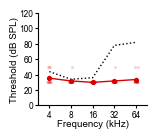

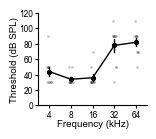

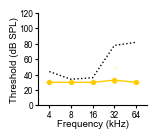

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color_dict = {'Thy1-GC6s; Cdh23 (Ahl/ahl)':"#DD0000",'Thy1-GC6s; Cdh23 (ahl/ahl)':'#000000','(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)':'#FFCC00'}
plt.rcParams['svg.fonttype'] = 'none'
plt.rc('axes', titlesize=6, labelsize=6) 
plt.rc('xtick', labelsize=6) 
plt.rc('ytick', labelsize=6) 
male = df[df['Sex']=="M"]

for geno in df['Genotype'].unique():
    temp = df[df['Genotype']==geno]
    fig, ax = plt.subplots()
    fig.set_figheight(1.2)
    fig.set_figwidth(1.4)
    if geno != "Thy1-GC6s; Cdh23 (ahl/ahl)":
     sns.pointplot(data=df[df['Genotype']== "Thy1-GC6s; Cdh23 (ahl/ahl)"],
        x="Freq", y="Threshold", color=color_dict["Thy1-GC6s; Cdh23 (ahl/ahl)"], 
        estimator="mean", markers=None, errorbar=None,
        linestyles= "dotted", linewidth=1)
     
    sns.pointplot(data=temp,
    x="Freq", y="Threshold", color=color_dict[geno], estimator="mean", errorbar = "se", 
    markers="o", linestyles= "-", linewidth=1, markersize=3)

    sns.stripplot(data=temp,
        x="Freq", y="Threshold", color=color_dict[geno], jitter = True, 
        marker="o", size=2, alpha=0.2)
    
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlabel("Frequency (kHz)",labelpad=0, fontsize=7)#ax.set_ylabel('Y', rotation=0, labelpad=10)
    plt.ylabel("Threshold (dB SPL)", labelpad=0, fontsize= 7)
    plt.ylim(0,120)
    plt.yticks(np.arange(0,140,20))
    plt.rc('axes', titlesize=6, labelsize=6) 
    import matplotlib as mpl
    mpl.rcParams['font.sans-serif'] = "Arial"
    # Then, "ALWAYS use sans-serif fonts"
    mpl.rcParams['font.family'] = "sans-serif"
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    ax.tick_params(axis='both', which='major', pad=2, length=2)
    print(geno)

    plt.savefig(save_path / ("Fig1_FI_SF1C_thresholds_neq_" +str(len(temp)) + str(geno).replace("/", "") + ".svg"), transparent=True)




m722.generateFRA(startFrame=45, endFrame=55, save_dir="fig", vmax=0.1)

In [12]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Performing three-way ANOVA
model = ols(
    'Threshold ~ C(Freq) + C(Sex) + C(Genotype) + C(Freq):C(Sex):C(Genotype)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Freq),8542.857143,4.0,16.243580,1.753481e-10
C(Sex),625.537866,1.0,4.757647,3.129722e-02
C(Genotype),16226.150586,2.0,61.705531,1.071319e-18
C(Freq):C(Sex):C(Genotype),14848.955641,22.0,5.133479,3.213189e-09
Residual,14462.857143,110.0,NaN,NaN


In [20]:
import stats
from statsmodels.stats.multitest import multipletests
import itertools
import scipy

def ttest_within_geno(data, dv_cat = 'Threshold', iv_cat = 'Sex'):
    genotypes = data['Genotype'].unique()
    ivs = data[iv_cat].unique()

    pvalues = []
    geno1s = [] 
    geno2s = []
    iv_list = []
    mean1 = []
    std1 = []
    mean2 = []
    std2 = []

    for geno in genotypes:
        temp1 = data[(data['Genotype']==geno) & (data[iv_cat]==ivs[0])]
        temp2 = data[(data['Genotype']==geno) & (data[iv_cat]==ivs[1])]
        pvalues.append(scipy.stats.ttest_ind(temp1[dv_cat], temp2[dv_cat]).pvalue)
        geno1s.append(geno)
        geno2s.append(geno)
        mean1.append(temp1[dv_cat].mean())
        mean2.append(temp2[dv_cat].mean())
        std1.append(temp1[dv_cat].std())
        std2.append(temp2[dv_cat].std())

    stats_df = pd.DataFrame({"geno1":geno1s, "geno2": geno2s, "mean1":mean1, "std1": std1, "mean2":mean2, "std2": std2, "pval":pvalues})
    mt = multipletests(stats_df['pval'], alpha = 0.05, method="fdr_bh")
    stats_df['reject_hs'] = mt[0]
    stats_df['pval_corrected'] = mt[1]
    return stats_df

stats_df = ttest_within_geno(df)
stats_df

c:\Users\travisb\miniconda3\envs\suite2p\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,geno1,geno2,mean1,std1,mean2,std2,pval,reject_hs,pval_corrected
0,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (Ahl/ahl),34.0,8.116794,30.0,0.000000,0.032563,False,0.097688
1,Thy1-GC6s; Cdh23 (ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),58.0,27.593103,50.0,25.955427,0.309081,False,0.463621
2,(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),30.0,0.000000,30.8,4.000000,0.535114,False,0.535114


In [21]:
import importlib
importlib.reload(stats)
stats.ttests(df, dv_cat  = 'Threshold', iv_cat ='Freq', type = 'mean')

c:\Users\travisb\miniconda3\envs\suite2p\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,geno1,geno2,Freq,mean1,std1,mean2,std2,pval,reject_hs,pval_corrected
0,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),4,35.454545,9.341987,44.000000,18.973666,1.994802e-01,False,3.578872e-01
1,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),8,31.818182,6.030227,34.000000,8.432740,5.003466e-01,False,5.773230e-01
2,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),16,30.000000,0.000000,36.000000,13.498971,1.557775e-01,False,3.338089e-01
3,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),32,31.818182,6.030227,78.000000,25.298221,1.141061e-05,True,5.705307e-05
4,Thy1-GC6s; Cdh23 (Ahl/ahl),Thy1-GC6s; Cdh23 (ahl/ahl),64,33.636364,8.090398,82.000000,16.865481,6.615001e-08,True,9.922501e-07
5,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),4,35.454545,9.341987,30.000000,0.000000,1.461564e-01,False,3.338089e-01
6,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),8,31.818182,6.030227,30.000000,0.000000,4.417548e-01,False,5.521935e-01
7,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),16,30.000000,0.000000,30.000000,0.000000,1.000000e+00,False,1.000000e+00
8,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),32,31.818182,6.030227,32.857143,7.559289,7.505950e-01,False,8.042089e-01
9,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),64,33.636364,8.090398,30.000000,0.000000,2.568398e-01,False,3.578872e-01


In [31]:
data = dict()
for i, mouse in mice.mice.iterrows():
    if mouse.Genotype not in data.keys():
        data[mouse.Genotype] = [np.nanmean(mouse.data.percentileResponse,axis=-1)]
    else:
        data[mouse.Genotype].append(np.nanmean(mouse.data.percentileResponse,axis=-1))

for key in data.keys():
    data[key] = (np.mean(np.stack(data[key]),axis=0),np.std(np.stack(data[key]),axis=0),np.stack(data[key]).shape[0])

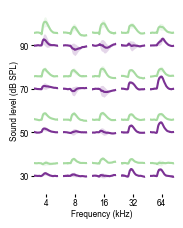

In [32]:
### old unused analysis for comparing actual amplitudes of respnses

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Ahl_B6 = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][0]
Ahl_B6_std = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][1]
Ahl_B6_animals = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][2]
Ahl_F1 = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][0]
Ahl_F1_std = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][1]
Ahl_F1_animals = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][2]
B6 = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][0]
B6_std = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][1]
B6_animals = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][2]


numcols = 5
numrows = 4
ymin=-0.1
ymax=0.2
ylabels = [90,70,50,30]
xlabels = [4,8,16,32,64]
xmin = 0
xmax = 100

fig, axs = plt.subplots(ncols=5, nrows=4)
for j in range(numrows):
    for i in range(numcols):
        error = np.sqrt(Ahl_B6_std**2/Ahl_B6_animals+B6**2/B6_animals)
        result = Ahl_B6[:,i,j]-B6[:,i,j]
        axs[j,i].fill_between(np.arange(Ahl_B6.shape[0]), result-error[:,i,j], result+error[:,i,j],color="#7b3294",alpha=0.2,lw=0)
        axs[j,i].plot(result,color="#7b3294")
        axs[j,i].set_xlim((xmin,xmax))
        axs[j,i].set_ylim((ymin,ymax))
        

offset = -0.07
for j in range(numrows):
    for i in range(numcols):
        error = np.sqrt(Ahl_B6_std**2/Ahl_B6_animals+Ahl_F1**2/Ahl_F1_animals)
        result = Ahl_B6[:,i,j]-Ahl_F1[:,i,j] - offset
        axs[j,i].fill_between(np.arange(Ahl_B6.shape[0]), result-error[:,i,j], result+error[:,i,j],color="#a6dba0",alpha=0.2,lw=0)
        axs[j,i].plot(result,color="#a6dba0")
        plt.xlim((xmin,xmax))
        plt.ylim((ymin,ymax))
        axs[j,i].axis("off")
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
        if i == 0 or j == (numrows-1):
            axs[j,i].axis("on")
            axs[j,i].spines['bottom'].set_visible(False)
            axs[j,i].spines['top'].set_visible(False)
            axs[j,i].spines['right'].set_visible(False)
            axs[j,i].spines['left'].set_visible(False)
            if i == 0:
                axs[j,i].set_yticks(np.array([0]), labels=[str(ylabels[j])], fontsize=6)
                axs[j,i].tick_params(axis='y', which='major', pad=1, length = 2)
            if j == (numrows-1):
                axs[j,i].set_xticks(np.array([(xmax+xmin)/2]), labels=[str(xlabels[i])], fontsize=6)
                axs[j,i].tick_params(axis='x', which='major', pad=1, length = 2)
        
plt.subplots_adjust(hspace=-0.2,wspace=0.2)
fig.supxlabel("Frequency (kHz)", fontsize=6)
fig.supylabel("Sound level (dB SPL)", fontsize=6,x=-0.01)
fig.set_figheight(2.4)
fig.set_figwidth(1.8)

for freq in range(5):
    for atten in range(4):
        axs[atten,freq].tick_params(axis='y', which='major', pad=2)
plt.rc('axes', titlesize=8, labelsize=8)

plt.savefig(save_path / "avg_subtracted_traces_lw0.pdf", transparent=True)


In [87]:
#take frame 44-46 as average response and compare accross geno, freq, atten
data = dict()
remap_freq = {0:4,1:8,2:16,3:32,4:64}
remap_atten = {0:0,1:20,2:40,3:60}
response_df = pd.DataFrame()
for i, mouse in mice.mice.iterrows():
    response = np.nanmean(mouse.data.percentileResponse[44:46,:],axis=(0,-1))
    for freq in range(5):
        for atten in range(4):
            temp_dict = {'mouse': [mouse.Mouse], 'genotype': [mouse.Genotype], 'sex':[mouse.Sex], 'freq_kHz': [freq], 'atten_dB': [atten], 'response':[response[freq,atten]]}
            tempdf = pd.DataFrame.from_dict(temp_dict)
            response_df = pd.concat([response_df,tempdf],axis=0)

response_df["freq_kHz"] = response_df["freq_kHz"].map(remap_freq)
response_df["atten_dB"] = response_df["atten_dB"].map(remap_atten)
response_df

,mouse,genotype,sex,freq_kHz,atten_dB,response
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,4,0,0.127200
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,4,20,0.045938
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,4,40,0.045362
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,4,60,0.071827
0,m602,Thy1-GC6s; Cdh23 (Ahl/ahl),F,8,0,0.067487
...,...,...,...,...,...,...
0,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,32,60,0.012293
0,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,64,0,0.110353
0,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,64,20,-0.011417
0,m1983,Thy1-GC6s; Cdh23 (ahl/ahl),M,64,40,-0.013377


In [88]:
grouped = response_df.sort_values("genotype").groupby(["genotype","freq_kHz","atten_dB"], sort=True)
response_df['group_id'] = grouped.ngroup()

# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Performing three-way ANOVA
model = ols(
    'response ~ C(freq_kHz) + C(genotype) + C(atten_dB) + C(freq_kHz):C(atten_dB):C(genotype)', data=response_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(freq_kHz),0.050307,4.0,18.288674,4.918690e-14
C(genotype),0.091681,2.0,66.659553,2.171969e-26
C(atten_dB),0.202403,3.0,98.108785,6.035472e-50
C(freq_kHz):C(atten_dB):C(genotype),0.113209,50.0,3.292482,9.143914e-12
Residual,0.343841,500.0,NaN,NaN


In [89]:
#data suggest significant interaction, moving ahead with multiple comparisons of genotype, freq, atten
results = pd.DataFrame()
for freq in response_df["freq_kHz"].drop_duplicates():
    for atten in response_df["atten_dB"].drop_duplicates():
        temp_df = response_df[(response_df["freq_kHz"]==freq) &(response_df["atten_dB"]==atten)]
        Ahl_B6 = temp_df[temp_df["genotype"]=="Thy1-GC6s; Cdh23 (Ahl/ahl)"]
        Ahl_F1 = temp_df[temp_df["genotype"]=="(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)"]
        B6 = temp_df[temp_df["genotype"]=="Thy1-GC6s; Cdh23 (ahl/ahl)"]
        result = scipy.stats.ttest_ind(Ahl_B6['response'], Ahl_F1['response'])
        result2 = scipy.stats.ttest_ind(Ahl_B6['response'], B6['response'])
        temp_results = pd.DataFrame({"group1":["Thy1-GC6s; Cdh23 (Ahl/ahl)","Thy1-GC6s; Cdh23 (Ahl/ahl)"],
                                    "group2":["(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)", "Thy1-GC6s; Cdh23 (ahl/ahl)"], 
                                    "freq_kHz":[freq, freq], 
                                    "atten_dB":[atten,atten],
                                    "Fvalue":[result.statistic,result2.statistic],
                                    "p_value":[result.pvalue,result2.pvalue]})
        results = pd.concat([results,temp_results],axis=0, ignore_index=True)


In [1]:
import statsmodels
hs_correct = statsmodels.stats.multitest.multipletests(results["p_value"], method="fdr_bh")
results["reject hs"] = list(hs_correct[0])
results["corrected alpha"] = list(hs_correct[1])


AttributeError: module 'statsmodels' has no attribute 'stats'

In [98]:
results.sort_values(["group2","freq_kHz","atten_dB"])

,group1,group2,freq_kHz,atten_dB,Fvalue,p_value,reject hs,corrected alpha
0,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),4,0,5.160642,9.479153e-05,True,0.000948
2,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),4,20,3.412789,3.562703e-03,True,0.008907
4,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),4,40,4.230815,6.361754e-04,True,0.002827
6,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),4,60,0.121866,9.045224e-01,False,0.933762
8,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),8,0,3.204989,5.519533e-03,True,0.012266
10,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),8,20,3.100209,6.876869e-03,True,0.014478
12,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),8,40,3.677155,2.038381e-03,True,0.006272
14,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),8,60,3.552173,2.654299e-03,True,0.007450
16,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),16,0,4.013186,1.003812e-03,True,0.003650
18,Thy1-GC6s; Cdh23 (Ahl/ahl),(F1) Thy1-GC6s; Cdh23 (Ahl/ahl),16,20,2.752699,1.415532e-02,True,0.026963


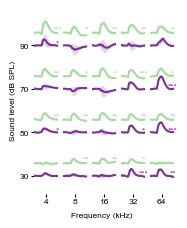

In [159]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

Ahl_B6 = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][0]
Ahl_B6_std = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][1]
Ahl_B6_animals = data['Thy1-GC6s; Cdh23 (Ahl/ahl)'][2]
Ahl_F1 = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][0]
Ahl_F1_std = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][1]
Ahl_F1_animals = data['(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)'][2]
B6 = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][0]
B6_std = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][1]
B6_animals = data['Thy1-GC6s; Cdh23 (ahl/ahl)'][2]


numcols = 5
numrows = 4
ymin=-0.1
ymax=0.2
ylabels = [90,70,50,30]
xlabels = [4,8,16,32,64]
xmin = 0
xmax = 100

fig, axs = plt.subplots(ncols=5, nrows=4)
for j in range(numrows):
    for i in range(numcols):
        error = np.sqrt(Ahl_B6_std**2/Ahl_B6_animals+B6**2/B6_animals)
        result = Ahl_B6[:,i,j]-B6[:,i,j]
        axs[j,i].fill_between(np.arange(Ahl_B6.shape[0]), result-error[:,i,j], result+error[:,i,j],color="#7b3294",alpha=0.2,lw=0)
        axs[j,i].plot(result,color="#7b3294")
        axs[j,i].set_xlim((xmin,xmax))
        axs[j,i].set_ylim((ymin,ymax))
        

offset = -0.07
for j in range(numrows):
    for i in range(numcols):
        error = np.sqrt(Ahl_B6_std**2/Ahl_B6_animals+Ahl_F1**2/Ahl_F1_animals)
        result = Ahl_B6[:,i,j]-Ahl_F1[:,i,j] - offset
        axs[j,i].fill_between(np.arange(Ahl_B6.shape[0]), result-error[:,i,j], result+error[:,i,j],color="#a6dba0",alpha=0.2,lw=0)
        axs[j,i].plot(result,color="#a6dba0")
        plt.xlim((xmin,xmax))
        plt.ylim((ymin,ymax))
        axs[j,i].axis("off")
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
        if i == 0 or j == (numrows-1):
            axs[j,i].axis("on")
            axs[j,i].spines['bottom'].set_visible(False)
            axs[j,i].spines['top'].set_visible(False)
            axs[j,i].spines['right'].set_visible(False)
            axs[j,i].spines['left'].set_visible(False)
            if i == 0:
                axs[j,i].set_yticks(np.array([0]), labels=[str(ylabels[j])], fontsize=6)
                axs[j,i].tick_params(axis='y', which='major', pad=1, length = 2)
            if j == (numrows-1):
                axs[j,i].set_xticks(np.array([(xmax+xmin)/2]), labels=[str(xlabels[i])], fontsize=6)
                axs[j,i].tick_params(axis='x', which='major', pad=1, length = 2)
        
plt.subplots_adjust(hspace=-0.2,wspace=0.2)
fig.supxlabel("Frequency (kHz)", fontsize=6)
fig.supylabel("Sound level (dB SPL)", fontsize=6,x=-0.01)
fig.set_figheight(2.4)
fig.set_figwidth(1.8)

for freq in range(5):
    for atten in range(4):
        axs[atten,freq].tick_params(axis='y', which='major', pad=2)
plt.rc('axes', titlesize=8, labelsize=8)


def return_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
            return "**"
    elif p < 0.05:
        return "*"
    else:
        return None

for i, freq in enumerate([4,8,16,32,64]):
    for j, atten in enumerate([0,20,40,60]):
        F1 = results[(results.freq_kHz==freq) & (results.atten_dB == atten) & (results.group2 == "(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)")]
        B6 = results[(results.freq_kHz==freq) & (results.atten_dB == atten) & (results.group2 != "(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)")]
        if F1['reject hs'].values:
            axs[j,i].text(0.95,.6,return_stars(F1['corrected alpha'].values),fontsize = 6, 
            transform=axs[j,i].transAxes, color = colors[1], horizontalalignment="center")
        if B6['reject hs'].values:
            axs[j,i].text(0.95,.35,return_stars(B6['corrected alpha'].values), fontsize = 6,
            transform=axs[j,i].transAxes, color = colors[0], horizontalalignment="center")


plt.savefig(save_path / "avg_subtracted_traces_lw0.pdf", transparent=True)